# <span style='background :#D6DBDF ' > **Topic: Stroke Prediction**

#### Overview
1. Purpose
2. Data and python packages importing
3. Data cleaning process
4. Exploratory Data Analysis (EDA)

## <font color="MidnightBlue">1. Purpose

> ML VS Keras ???

## <font color="MidnightBlue">2. Data and Python packages importing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/anyamanee/stroke_prediction/main/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bm,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## <font color="MidnightBlue">3. Data cleaning process

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bm                 4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bm                   201
smoking_status         0
stroke                 0
dtype: int64

   > There are 201 missing values in 'bm' column.<br>
   > We will consider the statistical value of bmi column to determine how to handle empty values.

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


> Because the average and mean values in the describe table are the same, we will deal with missing values in the 'bmi' column with mean.

In [8]:
df.bm.mean()

28.893236911794666

In [9]:
df_mod = df
df_mod['bm'] = df_mod['bm'].fillna(df.bm.mean())
df_mod.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bm                   0
smoking_status       0
stroke               0
dtype: int64

> Now, There are now no missing values in the data set.<br>
> And, because the minimum age in describe table is less than one, then we will count the number of value less than one.

In [10]:
df_check = df_mod.age[df_mod.age <1]
print(f'number of rows where the age is less than one: {len(df_check)}')
print(f'% of rows where the age is less than one: {( len(df_check)/df_mod.shape[0] )*100:.2f}%')

number of rows where the age is less than one: 43
% of rows where the age is less than one: 0.84%


> Now We have 43 rows of value in 'age' column that less than one, which is only 0.84%.<br>
> So, we replaced that 43 rows with 1.

In [11]:
df_mod[df_mod['age'] < 1] = 1
df_mod.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36208.806067,43.230677,0.105871,0.062427,105.355998,28.746604,0.057143
std,21333.486484,22.605002,0.307702,0.241952,46.214223,8.045834,0.232138
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,17236.500000,25.000000,0.000000,0.000000,76.747500,23.800000,0.000000
50%,36688.500000,45.000000,0.000000,0.000000,91.650000,28.400000,0.000000
75%,54428.000000,61.000000,0.000000,0.000000,113.847500,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


> Now that the data preparation is complete, move to the next step.

## <font color="MidnightBlue">4. Exploratory Data Analysis (EDA)

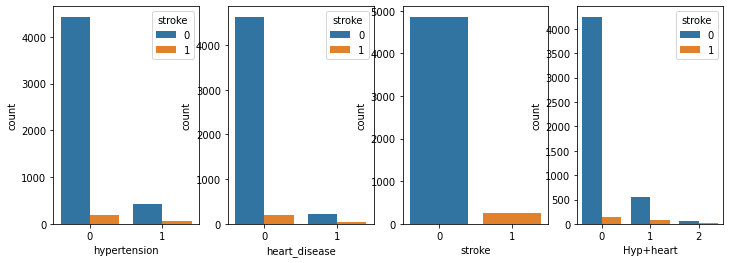

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(12, 4))
sns.countplot(x="hypertension",hue ="stroke",data = df_mod, ax=ax1)
sns.countplot(x="heart_disease",hue ="stroke", data = df_mod, ax=ax2)
sns.countplot(x="stroke",  data = df_mod, ax=ax3)
sns.countplot(x="Hyp+heart",hue ="stroke",data = df_mod, ax=ax4)

In [ ]:
df_mod['Hyp+heart'] = df_mod['hypertension'] + df_mod['heart_disease'] 

In [ ]:
# Data Encoding: 
#1. Categorical

#2. Label



In [ ]:
# Splitting the dataset into the Training set and Test set

In [ ]:
# Handling Imbalance data using SMOTE

In [ ]:
# Model Selection

In [ ]:
# Keras ANN

[1] https://www.kaggle.com/code/siddheshera/stroke-eda-smote-9-models-90-accuracy
[2] https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5
[3]https://www.kaggle.com/code/bhuvanchennoju/data-storytelling-auc-focus-on-strokes

### <font color="MidnightBlue">4.1 Gender

In [12]:
print(df_mod['gender'].value_counts())
gender_check = pd.DataFrame(df_mod.groupby(['gender','stroke'])['id'].count()).sort_values(by = 'id', ascending = False)
gender_check['percent'] = df_mod.groupby(['gender','stroke'])['id'].count()*100/df_mod.shape[0]
gender_check

Female    2979
Male      2087
1           43
Other        1
Name: gender, dtype: int64


,,id,percent
gender,stroke,,
Female,0,2838,55.538160
Male,0,1979,38.727984
Female,1,141,2.759295
Male,1,108,2.113503
1,1,43,0.841487
Other,0,1,0.019569


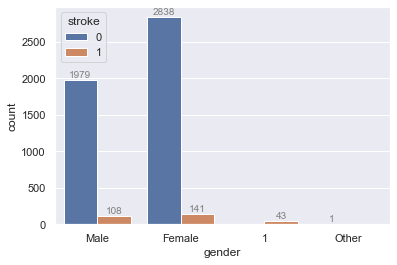

In [13]:
ax = sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df_mod, x="gender", hue="stroke")
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                 textcoords='offset points')

> จากข้อมูลทางการแพทย์ทั้งหมด 5,110 ราย พบว่ามีผู้หญิง  2,979 (58%) และผู้ชาย 2,087 (41%) โดยมีผู้หญิงมากกว่าผู้ชาย 892 คน<br>
> จำนวผู้ป่วยโรคหลอดเลือดสมองในผู้หญิง และผู้ชายมีจำนวนใกล้เคียงคือ 141 และ 108 คนตามลำดับโดยคิดเป็น 2.8% และ 2.1% จากทั้งหมด

### <font color="MidnightBlue">4.2 Age

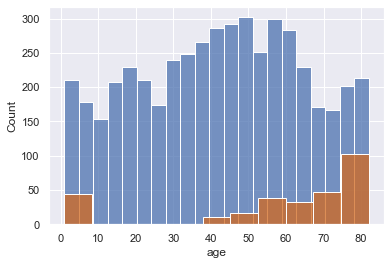

In [14]:
sns.histplot(df_mod[df_mod['stroke'] == 0]["age"])
sns.histplot(df_mod[df_mod['stroke'] == 1]["age"], color="chocolate") 
plt.show()

> จากกราฟด้านบนที่แสดงค่าระหว่างช่วงอายุ และ จำนวนคนในช่วงอายุนั้นพบว่า ผู้ป่วยโรคหลอดเลือดสมองส่วนใหญ่จะเป็นผู้สูงอายุ หรือหากสังเกตุจากกราฟจะเริ่มพบผู้ป่วยโรคนี้ตั้งแต่อายุ 40 ปีขึ้นไป

## hypertension

In [1]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax_hyp = sns.countplot(x="hypertension",data = df_mod, ax=ax1)
ax_hyp2 = sns.countplot(x="hypertension", hue ="stroke", data = df_mod, ax=ax2)


def plot_detail(ax1, records):
    total = len(records)
    for p in ax1.patches:
        value = '({:.0f})'.format(p.get_height())
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + 0.05 + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 40
        ax1.annotate(percentage, (x, y), size = 12, ha = 'right')
        ax1.annotate(value, (x,y), size = 12)
        
plot_detail(ax_hyp, df_mod.hypertension)
ax_hyp.set_title("Hypertension", size = 20)
ax_hyp.set_xlabel("Hypertension", size = 15)
ax_hyp.set_ylabel("Number of Patient", size = 15)

plot_detail(ax_hyp2, df_mod.hypertension)
ax_hyp2.set_title("Hypertension with stroke", size = 20)
ax_hyp2.set_xlabel("Hypertension", size = 15)
ax_hyp2.set_ylabel("Number of Patient", size = 15)

plt.show()

NameError: name 'plt' is not defined

• จำนวนคนที่เป็น Hypertension คิดเป็น 10.6% จากจำนวนคนทั้งหมด

• 3.6% เป็นคนที่มีอาการ stroke เพียงอย่างเดียว ในขณะที่ 1.3% เป็นคนที่มมีอาการ stroke ร่วมกับ Hypertension

## heart_disease

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax_heart = sns.countplot(x="heart_disease",data = df_mod, ax=ax1)
ax_heart2 = sns.countplot(x="heart_disease", hue ="stroke",data = df_mod, ax=ax2)


plot_detail(ax_heart, df.heart_disease)
plt.xlabel("Heart Disease", size = 15)
plt.ylabel("Number of Patient", size = 15)
plt.title("Heart Disease", size = 20)


plot_detail(ax_heart2, df_mod.hypertension)
ax_hyp2.set_title("Hypertension with stroke", size = 20)
ax_hyp2.set_xlabel("Hypertension", size = 15)
ax_hyp2.set_ylabel("Number of Patient", size = 15)


plt.show()

• จำนวนคนที่เป็น heart disease คิดเป็น 5.4% จากจำนวนคนทั้งหมด

• 4.0% เป็นคนที่มีอาการ stroke เพียงอย่างเดียว ในขณะที่ 0.9% เป็นคนที่มีอาการ stroke ร่วมกับ heart disease

## ever_married

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax_married = sns.countplot(x="ever_married",data = df_mod, ax=ax1)
ax_married2 = sns.countplot(x="ever_married", hue ="stroke",data = df_mod, ax=ax2)

plot_detail(ax_married, df.ever_married)
plt.xlabel("ever married", size = 15)
plt.ylabel("Number of Patient", size = 15)
plt.title("Married Status", size = 20)

plot_detail(ax_heart2, df_mod.hypertension)
ax_hyp2.set_title("Hypertension with stroke", size = 20)
ax_hyp2.set_xlabel("Hypertension", size = 15)
ax_hyp2.set_ylabel("Number of Patient", size = 15)

plt.show()

• จำนวนคนที่แต่งงานแล้วคิดเป็น 65.6% จากจำนวนคนทั้งหมด

## work_type

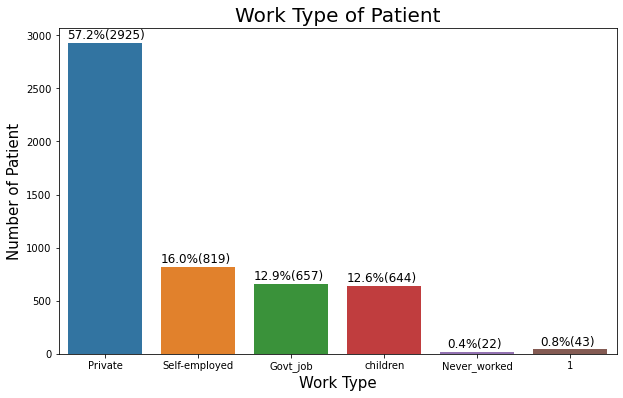

In [12]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='work_type', data=df_mod)

# define function for showing anotate
def plot_detail(ax1, feature):
    total = len(feature)
    for p in ax1.patches:
        value = '({:.0f})'.format(p.get_height())
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+0.05 + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()+40
        ax1.annotate(percentage, (x, y), size = 12, ha = 'right')
        ax1.annotate(value, (x,y), size = 12)

plot_detail(ax, df.work_type)


plt.xlabel("Work Type", size = 15)
plt.ylabel("Number of Patient", size = 15)
plt.title("Work Type of Patient", size = 20)
plt.show()

- ผู้ป่วยส่วนใหญ่กว่า 57.2% มี working type เป็น Private
- รองลงมาคือ Self-employed 16%, Government job 12.9% และ เป็นเด็ก 12.6%
- ในส่วนของผู้ป่วยที่ไม่ได้ทำงาน และ อื่นๆ มีจำนวนเพียงแค่ประมาณ 65คน

## Residence_type

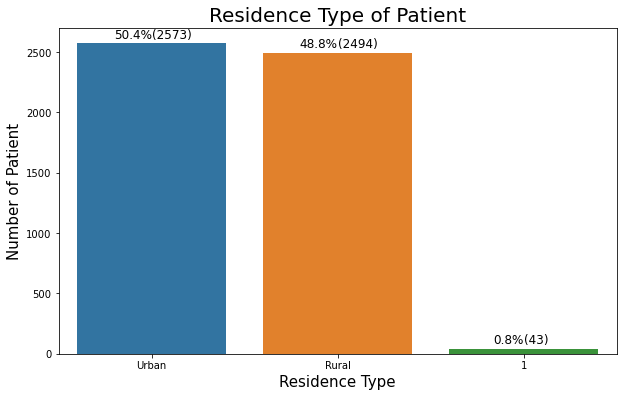

In [14]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='Residence_type', data=df_mod)
plot_detail(ax, df.Residence_type)


plt.xlabel("Residence Type", size = 15)
plt.ylabel("Number of Patient", size = 15)
plt.title("Residence Type of Patient", size = 20)
plt.show()

ในส่วนของประเภทที่อยู่อาศัยของผู้ป่วย หรือ Residence type นั้น แบ่งออกเป็น Urban และ Rural ในปริมาณค่อนข้างใกล้เคียงกัน

## avg_glucose_level

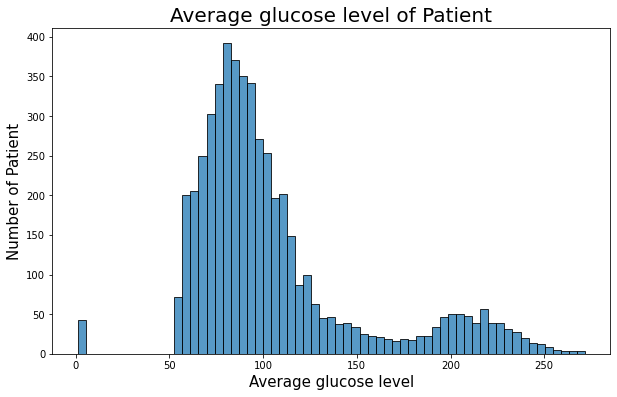

In [18]:
fig = plt.figure(figsize=(10,6))
ax = sns.histplot(x='avg_glucose_level', data=df_mod)



plt.xlabel("Average glucose level", size = 15)
plt.ylabel("Number of Patient", size = 15)
plt.title("Average glucose level of Patient", size = 20)
plt.show()

- จากข้อมูลระดับน้ำตาลในเลือดเฉลี่ยของผู้ป่วย การกระจายตัวจะมีลักษณะเป็น right skewed 
- ผู้ป่วยส่วนมากจะมีค่าระดับน้ำตาลในเลือดเฉลี่ยอยู่ในช่วงประมาณ 55 ถึง 130

### Ploy session

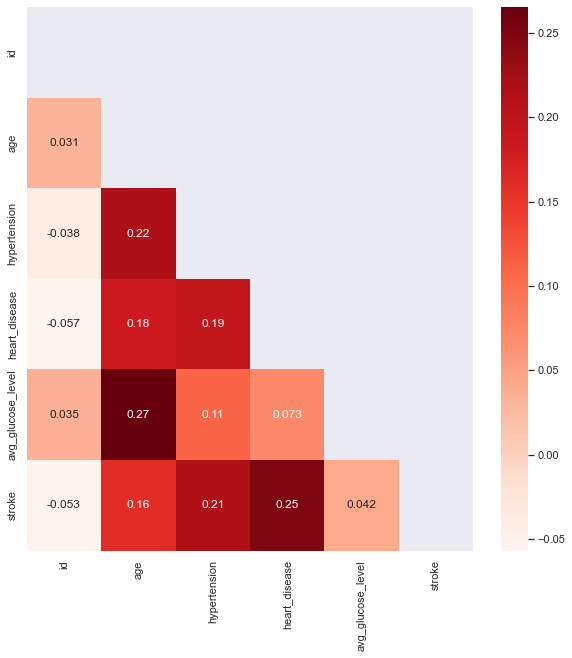

In [32]:
#Using Pearson Correlation
# Compute the correlation matrix
plt.figure(figsize=(10,10))
cor = df.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor,mask =mask, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.009]

## bm, smoking_status, stroke

never smoked       1892
Unknown            1501
formerly smoked     885
smokes              789
1                    43
Name: smoking_status, dtype: int64


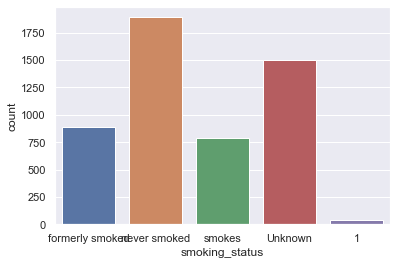

0    4818
1     292
Name: stroke, dtype: int64


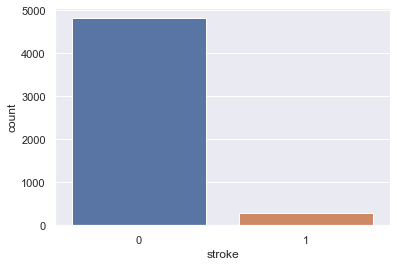

In [34]:
header = df_mod.columns
lst_plot = header[[10,11]]
for xdata in lst_plot:
    print(df_mod[xdata].value_counts())
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(data=df_mod, x=xdata)
    plt.show()

In [36]:
df_mod.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36208.806067,43.230677,0.105871,0.062427,105.355998,0.057143
std,21333.486484,22.605002,0.307702,0.241952,46.214223,0.232138
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,17236.500000,25.000000,0.000000,0.000000,76.747500,0.000000
50%,36688.500000,45.000000,0.000000,0.000000,91.650000,0.000000
75%,54428.000000,61.000000,0.000000,0.000000,113.847500,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,1.000000


C:\Users\anyamanee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


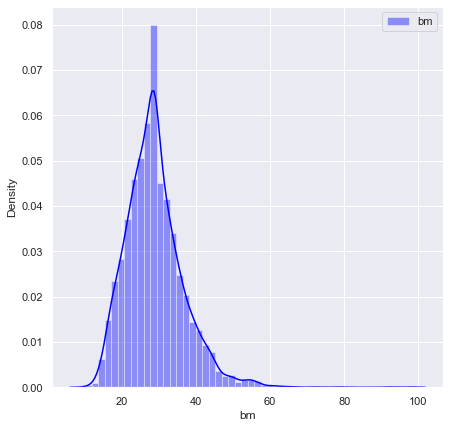

In [57]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df_mod['bm'], color="blue", label='bm')
plt.legend()

C:\Users\anyamanee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anyamanee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


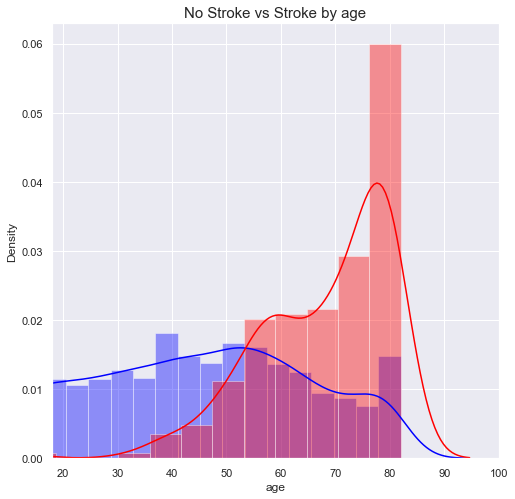

C:\Users\anyamanee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anyamanee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


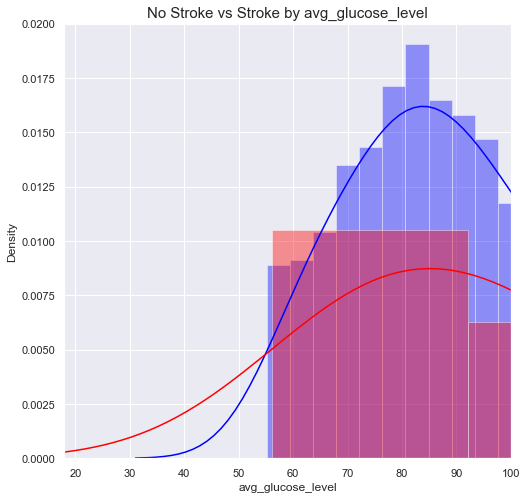

C:\Users\anyamanee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anyamanee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


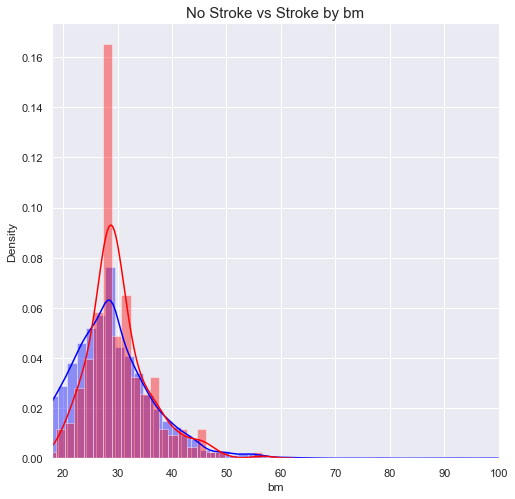

In [59]:

header = df_mod.columns
lst_plot = header[[2,8,9]]
for xdata in lst_plot:
    plt.figure(figsize=(8,8))

    sns.distplot(df_mod[df_mod['stroke'] == 0][xdata], color='blue') # No Stroke - green
    sns.distplot(df_mod[df_mod['stroke'] == 1][xdata], color='red') # Stroke - Red

    plt.title(f'No Stroke vs Stroke by {xdata}', fontsize=15)
    plt.xlim([18,100])
    plt.show()

hello
